<a href="https://colab.research.google.com/github/andrewleem/andrewleem/blob/main/personal_india_secondhand_cars_dataprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인도 중고차 시장 데이터 분석

## 데이터 불러오기

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### 데이터프레임 생성

# 파일 경로 설정
file_name = '/content/drive/MyDrive/used_car.csv'

# csv file --> pd.read_csv() --> dataframe 자료형 변환
df = pd.read_csv(file_name, index_col=0)

# 결과 확인하기
print(f'전체 데이터 출력 : \n{df}')
print('_'*80)
print('데이터에 대한 전반적인 정보')
df.info()

전체 데이터 출력 : 
                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type

## 데이터 전처리

### 누락 데이터 처리

In [ ]:
### 각 컬러별 누락 데이터의 수 확인 --> isnull().sum() 사용
print(df.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [ ]:
### New_Price 컬럼 --> 제거
cleaned_df = df.drop(columns=['New_Price'])

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
### New_Price 컬럼 --> 제거
cleaned_df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'], inplace=True)

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
### index --> reset --> df.reset_index(drop=True, inplace=True)
cleaned_df.reset_index(drop=True, inplace=True)

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


### 단위 제거

In [ ]:
'''
1. 목표 : 값에 단위가 붙어있는 컬럼에 대해서 단위 제거
2. 대상 컬럼 : Mileage, Engine, Power
3. 예시) 28.4 kmpl --> 28.4
4. 방법 : 공백을 기준으로 문자열 split --> "28.4 kmpl".split()[0]
'''

### Mileage 컬럼
cleaned_df.Mileage = cleaned_df.Mileage.apply(lambda x:x.split()[0])

# Engine 컬럼
cleaned_df.Engine = cleaned_df.Engine.apply(lambda x:x.split()[0])

# power 컬럼
cleaned_df.Power = cleaned_df.Power.apply(lambda x:x.split()[0])

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [ ]:
### 단위 제거 후 기본 정보 확인
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 550.6+ KB


#### 자료형 변환

In [ ]:
"""
1. 목표 : Mileage, Engine, Power 컬럼의 성격(자료형) --> 문자열 --> float 변환
2. 사용 함수 : df.astype({'col1':'float', 'col2':'int'})
"""

# astype() 함수 적용
cleaned_df = cleaned_df.astype({'Mileage':'float', 'Engine':'float', 'Power':'float'})

# 결과 확인하기 --> info() 함수
print('자료형 변환의 결과')
cleaned_df.info()

자료형 변환의 결과
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


### 불필요한 컬럼 제거

In [ ]:
"""
### 제거 대상 컬럼 : Location, Owner_type, Seats
"""

df = cleaned_df.drop(columns=['Location', 'Owner_Type', 'Seats'])
df_outlier = cleaned_df.drop(columns=['Name', 'Location', 'Owner_Type', 'Seats'])

# 결과 확인하기
print(df)
print('-'*80)
print(df_outlier)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5867                  Maruti Swift VDI  2014              27365    Diesel   
5868          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5869             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5870                Maruti Wagon R VXI  2013              46000    Petrol   
5871             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price  
0          Manual    26

### 이상치 처리

In [ ]:
### 그래프 처리와 관련된 실행 환경 설정 변수 확인

# 필요한 라이브러리 임폴트
import matplotlib.pyplot as plt

print(plt.rcParams)

# 이미지 크기 설정
plt.rcParams['figure.figsize'] = [4,3]

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

In [ ]:
### 수치형 데이터 --> 요약 통계량 확인
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,160.000000


Year 컬럼 이상치 시각화


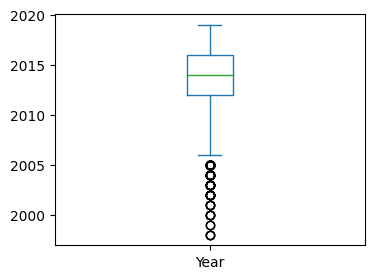

--------------------------------------------------------------------------------
Kilometers_Driven 컬럼 이상치 시각화


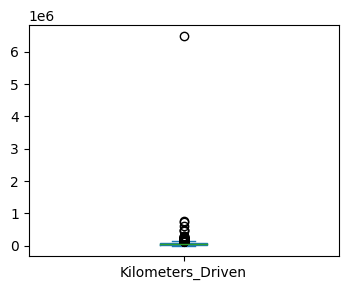

Mileage 컬럼 이상치 시각화


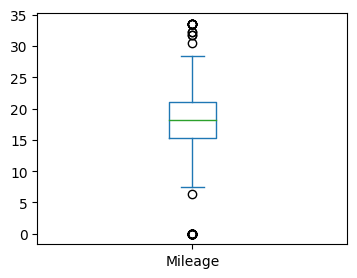

Engine 컬럼 이상치 시각화


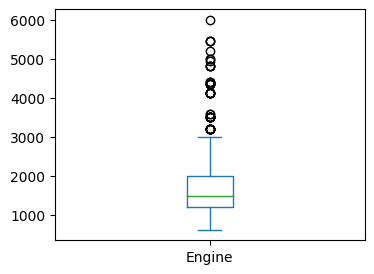

Power 컬럼 이상치 시각화


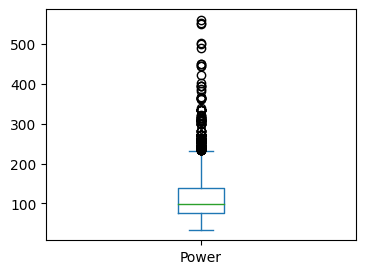

Price 컬럼 이상치 시각화


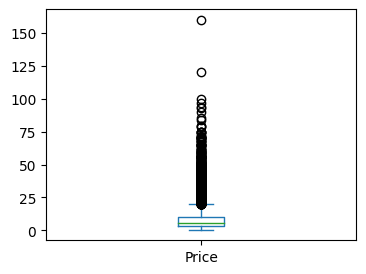

In [ ]:
### boxplot을 이용한 이상치 시각화

# Year 컬럼
print("Year 컬럼 이상치 시각화")
df.Year.plot(kind='box')
plt.show()

print('-'*80)

# Kilometers_Driven 컬럼
print("Kilometers_Driven 컬럼 이상치 시각화")
df.Kilometers_Driven.plot(kind='box')
plt.show()

# Mileage 컬럼
print("Mileage 컬럼 이상치 시각화")
df.Mileage.plot(kind='box')
plt.show()

# Engine 컬럼
print("Engine 컬럼 이상치 시각화")
df.Engine.plot(kind='box')
plt.show()

# Power 컬럼
print("Power 컬럼 이상치 시각화")
df.Power.plot(kind='box')
plt.show()

# Price 컬럼
print("Price 컬럼 이상치 시각화")
df.Price.plot(kind='box')
plt.show()

#### Year 컬럼

Year 컬럼의 첫번째 IQR = 4.0
--------------------------------------------------------------------------------
Year 컬럼의 첫번째 정상 범위의 최소값 = 2006.0
--------------------------------------------------------------------------------
Year 컬럼의 첫번째 정상 범위의 최대값 = 2022.0
--------------------------------------------------------------------------------
Year 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([ 215,  263,  302,  323,  338,  351,  402,  472,  479,  517,
            ...
            5518, 5577, 5702, 5749, 5751, 5770, 5772, 5781, 5811, 5839],
           dtype='int64', length=105)
--------------------------------------------------------------------------------


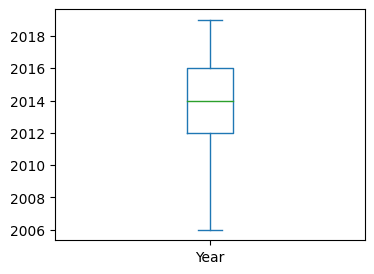

In [ ]:
# Year 컬럼의 첫번째 이상치 판단

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# IQR 추출
Q1 = df.Year.quantile(q=0.25)
Q3 = df.Year.quantile(q=0.75)
IQR = Q3 - Q1
print(f'Year 컬럼의 첫번째 IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소값
min = Q1 - (IQR*1.5)
print(f'Year 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = Q3 + (IQR*1.5)
print(f'Year 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# df.Year < 2006 조건을 만족하는 행 --> index 추출 --> loc 인덱서 + 블리언 인덱싱
year_outlier_index = df.Year.loc[df.Year<2006].index
print(f'Year 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{year_outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_Year = df.Year.drop(index=year_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_Year.plot(kind='box')
plt.show()

#### Kilometers_Driven 컬럼

Kilometers_Driven 컬럼의 첫번째 IQR = 38980.25
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 첫번째 정상 범위의 최소값 = -25047.875
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 첫번째 정상 범위의 최대값 = 130873.125
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  29,   64,   76,  149,  159,  160,  176,  221,  241,  251,
            ...
            5659, 5661, 5693, 5699, 5709, 5711, 5729, 5770, 5807, 5811],
           dtype='int64', length=199)
--------------------------------------------------------------------------------


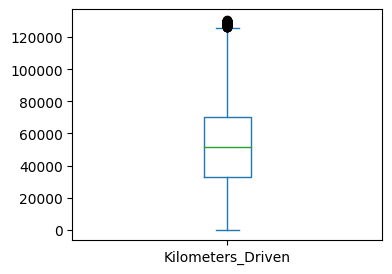

In [ ]:
# Kilometers_Driven 컬럼의 첫번째 이상치 판단 --> IQR

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# IQR 추출
Q1 = df.Kilometers_Driven.quantile(q=0.25)
Q3 = df.Kilometers_Driven.quantile(q=0.75)
IQR = Q3 - Q1
print(f'Kilometers_Driven 컬럼의 첫번째 IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소값
min = Q1 - (IQR*1.5)
print(f'Kilometers_Driven 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = Q3 + (IQR*1.5)
print(f'Kilometers_Driven 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# df.Kilometers_Driven > 130873.125 조건을 만족하는 행 --> index 추출 --> loc 인덱서 + 블리언 인덱싱
Kilometers_outlier_index = df.Kilometers_Driven.loc[df.Kilometers_Driven>130873.125].index
print(f'Kilometers_Driven 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{Kilometers_outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_Kilometers = df.Kilometers_Driven.drop(index=Kilometers_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_Kilometers.plot(kind='box')
plt.show()

Kilometers_Driven 컬럼의 두번째 IQR = 37224.0
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 두번째 정상 범위의 최소값 = -23060.0
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 두번째 정상 범위의 최대값 = 125836.0
--------------------------------------------------------------------------------
Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : 
Int64Index([ 115,  349,  471,  519,  558,  606,  888, 1041, 1574, 1686, 1931,
            2234, 2486, 2546, 2598, 2869, 3020, 3066, 3122, 3189, 3234, 3336,
            3343, 3345, 3386, 3616, 3684, 3706, 3730, 3794, 4177, 4313, 4509,
            4546, 4653, 4748, 5318, 5361, 5408, 5511],
           dtype='int64')
--------------------------------------------------------------------------------


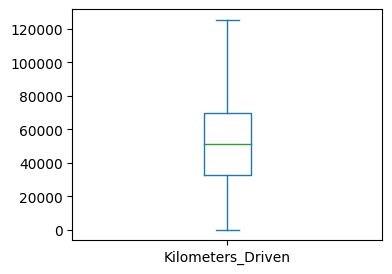

In [ ]:
# Kilometers_Driven 컬럼의 두번째 이상치 판단 --> IQR

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# IQR 추출
Q1 = cleaned_Kilometers.quantile(q=0.25)
Q3 = cleaned_Kilometers.quantile(q=0.75)
IQR = Q3 - Q1
print(f'Kilometers_Driven 컬럼의 두번째 IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소값
min = Q1 - (IQR*1.5)
print(f'Kilometers_Driven 컬럼의 두번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = Q3 + (IQR*1.5)
print(f'Kilometers_Driven 컬럼의 두번째 정상 범위의 최대값 = {max}')

print('-'*80)

# cleaned_Kilometers > 125836 조건을 만족하는 행 --> index 추출 --> loc 인덱서 + 블리언 인덱싱
Kilometers_outlier_index = cleaned_Kilometers.loc[cleaned_Kilometers>125836].index
print(f'Kilometers_Driven 컬럼의 두번째 이상치 데이터의 인덱스 : \n{Kilometers_outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_Kilometers = cleaned_Kilometers.drop(index=Kilometers_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_Kilometers.plot(kind='box')
plt.show()

#### Mileage 컬럼

Mileage 컬럼의 첫번째 IQR = 5.840000000000002
--------------------------------------------------------------------------------
Mileage 컬럼의 첫번째 정상 범위의 최소값 = 6.499999999999998
--------------------------------------------------------------------------------
Mileage 컬럼의 첫번째 정상 범위의 최대값 = 29.860000000000003
--------------------------------------------------------------------------------
Mileage 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  14,   67,  526,  685,  932,  966, 1029, 1226, 1236, 1273, 1295,
            1316, 1718, 2009, 2309, 2605, 2625, 2963, 3011, 3036, 3046, 3126,
            3186, 3460, 3768, 4033, 4124, 4192, 4300, 4571, 4587, 4648, 4888,
            4894, 5048, 5178, 5241, 5571, 5640, 5732, 5790, 5826, 5864],
           dtype='int64')
--------------------------------------------------------------------------------


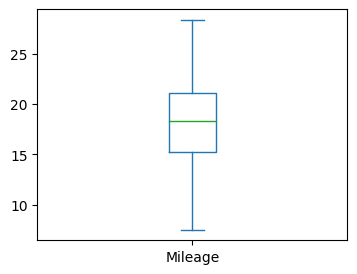

In [ ]:
# Mileage 컬럼의 첫번째 이상치 판단 --> IQR

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# IQR 추출
Q1 = df.Mileage.quantile(q=0.25)
Q3 = df.Mileage.quantile(q=0.75)
IQR = Q3 - Q1
print(f'Mileage 컬럼의 첫번째 IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소값
min = Q1 - (IQR*1.5)
print(f'Mileage 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = Q3 + (IQR*1.5)
print(f'Mileage 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# df.Mileage > 30 또는 df.Mileage < 6.5  조건을 만족하는 행 --> index 추출 --> loc 인덱서 + 블리언 인덱싱
Mileage_outlier_index = df.Mileage.loc[(df.Mileage>30) | (df.Mileage<6.5)].index
print(f'Mileage 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{Mileage_outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_Mileage = df.Mileage.drop(index=Mileage_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_Mileage.plot(kind='box')
plt.show()

#### Engine 컬럼

Engine 컬럼의 첫번째 IQR = 793.0
--------------------------------------------------------------------------------
Engine 컬럼의 첫번째 정상 범위의 최소값 = 8.5
--------------------------------------------------------------------------------
Engine 컬럼의 첫번째 정상 범위의 최대값 = 3180.5
--------------------------------------------------------------------------------
Engine 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  70,  147,  442,  567,  570,  671,  681,  772,  780, 1008, 1045,
            1062, 1314, 1389, 1552, 1678, 1882, 2048, 2517, 2593, 2605, 2898,
            2948, 2983, 2997, 3032, 3112, 3158, 3254, 3487, 3933, 4028, 4118,
            4232, 4276, 4338, 4446, 4512, 4575, 4602, 4700, 4747, 4781, 4813,
            4959, 5145, 5190, 5208, 5281, 5283, 5306, 5385, 5465, 5589, 5640,
            5742, 5775, 5864],
           dtype='int64')
--------------------------------------------------------------------------------


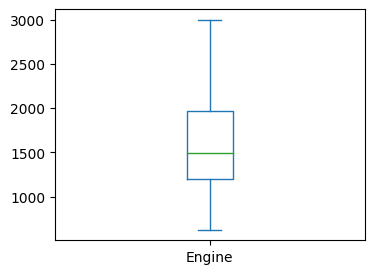

In [ ]:
# Engine 컬럼의 첫번째 이상치 판단 --> IQR

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# IQR 추출
Q1 = df.Engine.quantile(q=0.25)
Q3 = df.Engine.quantile(q=0.75)
IQR = Q3 - Q1
print(f'Engine 컬럼의 첫번째 IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소값
min = Q1 - (IQR*1.5)
print(f'Engine 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = Q3 + (IQR*1.5)
print(f'Engine 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# df.Engie > 3180.5 조건을 만족하는 행 --> index 추출 --> loc 인덱서 + 블리언 인덱싱
Engine_outlier_index = df.Engine.loc[df.Engine>3180.5].index
print(f'Engine 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{Engine_outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_Engine = df.Engine.drop(index=Engine_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_Engine.plot(kind='box')
plt.show()

#### Power 컬럼

Power 컬럼의 첫번째 IQR = 63.099999999999994
--------------------------------------------------------------------------------
Power 컬럼의 첫번째 정상 범위의 최소값 = -19.64999999999999
--------------------------------------------------------------------------------
Power 컬럼의 첫번째 정상 범위의 최대값 = 232.75
--------------------------------------------------------------------------------
Power 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Int64Index([  38,   70,  100,  104,  130,  143,  147,  163,  209,  253,
            ...
            5640, 5641, 5662, 5726, 5742, 5775, 5782, 5800, 5861, 5864],
           dtype='int64', length=238)
--------------------------------------------------------------------------------


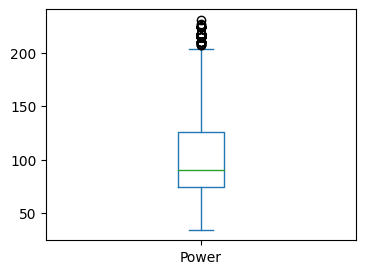

In [ ]:
# Power 컬럼의 첫번째 이상치 판단 --> IQR

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# IQR 추출
Q1 = df.Power.quantile(q=0.25)
Q3 = df.Power.quantile(q=0.75)
IQR = Q3 - Q1
print(f'Power 컬럼의 첫번째 IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소값
min = Q1 - (IQR*1.5)
print(f'Power 컬럼의 첫번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = Q3 + (IQR*1.5)
print(f'Power 컬럼의 첫번째 정상 범위의 최대값 = {max}')

print('-'*80)

# df.Power > 232.75 조건을 만족하는 행 --> index 추출 --> loc 인덱서 + 블리언 인덱싱
Power_outlier_index = df.Power.loc[df.Power>232.75].index
print(f'Power 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{Power_outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_Power = df.Power.drop(index=Power_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_Power.plot(kind='box')
plt.show()

Power 컬럼의 두번째 IQR = 52.31999999999999
--------------------------------------------------------------------------------
Power 컬럼의 두번째 정상 범위의 최소값 = -4.47999999999999
--------------------------------------------------------------------------------
Power 컬럼의 두번째 정상 범위의 최대값 = 204.79999999999998
--------------------------------------------------------------------------------
Power 컬럼의 두번째 이상치 데이터의 인덱스 : 
Int64Index([  84,  115,  338,  386,  392,  401,  539,  859,  959, 1005, 1075,
            1145, 1254, 1279, 1435, 1499, 1582, 1595, 1861, 1953, 2052, 2082,
            2200, 2491, 2718, 3136, 3241, 3626, 3629, 3829, 3835, 3938, 4035,
            4135, 4162, 4417, 4503, 4541, 4558, 4843, 4867, 4911, 4953, 5149,
            5172, 5475, 5553, 5704, 5721, 5859],
           dtype='int64')
--------------------------------------------------------------------------------


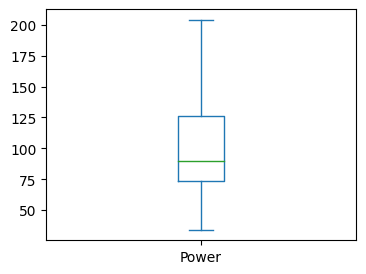

In [ ]:
# Power 컬럼의 두번째 이상치 판단 --> IQR

"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""

# IQR 추출
Q1 = cleaned_Power.quantile(q=0.25)
Q3 = cleaned_Power.quantile(q=0.75)
IQR = Q3 - Q1
print(f'Power 컬럼의 두번째 IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소값
min = Q1 - (IQR*1.5)
print(f'Power 컬럼의 두번째 정상 범위의 최소값 = {min}')

print('-'*80)

# 정상 범위의 최대값
max = Q3 + (IQR*1.5)
print(f'Power 컬럼의 두번째 정상 범위의 최대값 = {max}')

print('-'*80)

# cleaned_Power > 204.8 조건을 만족하는 행 --> index 추출 --> loc 인덱서 + 블리언 인덱싱
Power_outlier_index = cleaned_Power.loc[cleaned_Power>204.8].index
print(f'Power 컬럼의 두번째 이상치 데이터의 인덱스 : \n{Power_outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_Power = cleaned_Power.drop(index=Power_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_Power.plot(kind='box')
plt.show()

In [ ]:
### 이상치 처리 후 남아있는 데이터 확인하기

# Year 컬럼
print(cleaned_Year)

print('-'*80)

# Kilometers_Driven 컬럼
print(cleaned_Kilometers)

print('-'*80)

# Mileage 컬럼
print(cleaned_Mileage)

print('-'*80)

# Engine 컬럼
print(cleaned_Engine)

print('-'*80)

# Power 컬럼
print(cleaned_Power)

0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
5867    2014
5868    2015
5869    2012
5870    2013
5871    2011
Name: Year, Length: 5767, dtype: int64
--------------------------------------------------------------------------------
0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
5867     27365
5868    100000
5869     55000
5870     46000
5871     47000
Name: Kilometers_Driven, Length: 5633, dtype: int64
--------------------------------------------------------------------------------
0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
5867    28.40
5868    24.40
5869    14.00
5870    18.90
5871    25.44
Name: Mileage, Length: 5829, dtype: float64
--------------------------------------------------------------------------------
0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
5867    1248.0
5868    1120.0
5869    2498.0
5870     998.0
5871     9

In [ ]:
### 원본 데이터 확인
print(df)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5867                  Maruti Swift VDI  2014              27365    Diesel   
5868          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5869             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5870                Maruti Wagon R VXI  2013              46000    Petrol   
5871             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price  
0          Manual    26

In [ ]:
### 각 컬럼 병합 --> 데이터프레임 생성
df_concat = pd.concat([df.Name, cleaned_Year, cleaned_Kilometers, df.Fuel_Type, df.Transmission, cleaned_Mileage, cleaned_Engine, cleaned_Power, df.Price],
                      join='inner',
                      axis=1)

# 결과 확인하기
print(df_concat)

                                  Name  Year  Kilometers_Driven Fuel_Type  \
0               Maruti Wagon R LXI CNG  2010              72000       CNG   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                         Honda Jazz V  2011              46000    Petrol   
3                    Maruti Ertiga VDI  2012              87000    Diesel   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   
...                                ...   ...                ...       ...   
5867                  Maruti Swift VDI  2014              27365    Diesel   
5868          Hyundai Xcent 1.1 CRDi S  2015             100000    Diesel   
5869             Mahindra Xylo D4 BSIV  2012              55000    Diesel   
5870                Maruti Wagon R VXI  2013              46000    Petrol   
5871             Chevrolet Beat Diesel  2011              47000    Diesel   

     Transmission  Mileage  Engine   Power  Price  
0          Manual    26

In [ ]:
### index --> reset
df_concat.reset_index(drop=True, inplace=True)

# 결과 확인하기
df_concat

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,26.60,998.0,58.16,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,19.67,1582.0,126.20,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,18.20,1199.0,88.70,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,20.77,1248.0,88.76,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,17.74
...,...,...,...,...,...,...,...,...,...
5208,Maruti Swift VDI,2014,27365,Diesel,Manual,28.40,1248.0,74.00,4.75
5209,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,24.40,1120.0,71.00,4.00
5210,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,14.00,2498.0,112.00,2.90
5211,Maruti Wagon R VXI,2013,46000,Petrol,Manual,18.90,998.0,67.10,2.65


### Feature Engineering

#### 자료형이 object인 컬럼의 고유값 개수 확인

##### Name 컬럼

In [ ]:
### Name 컬럼 --> 항목별 개수 확인
df_concat.Name.value_counts()

Mahindra XUV500 W8 2WD                 45
Maruti Swift VDI                       44
Honda City 1.5 S MT                    33
Maruti Swift Dzire VDI                 32
Hyundai i10 Sportz                     30
                                       ..
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Chevrolet Sail Hatchback 1.2 LS ABS     1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1572, dtype: int64

In [ ]:
### Name --> 회사이름만 남기고 차종은 생략
df_concat.Name = df_concat.Name.apply(lambda x:x.split()[0])

# 결과 확인하기
df_concat

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,Maruti,2010,72000,CNG,Manual,26.60,998.0,58.16,1.75
1,Hyundai,2015,41000,Diesel,Manual,19.67,1582.0,126.20,12.50
2,Honda,2011,46000,Petrol,Manual,18.20,1199.0,88.70,4.50
3,Maruti,2012,87000,Diesel,Manual,20.77,1248.0,88.76,6.00
4,Audi,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,17.74
...,...,...,...,...,...,...,...,...,...
5208,Maruti,2014,27365,Diesel,Manual,28.40,1248.0,74.00,4.75
5209,Hyundai,2015,100000,Diesel,Manual,24.40,1120.0,71.00,4.00
5210,Mahindra,2012,55000,Diesel,Manual,14.00,2498.0,112.00,2.90
5211,Maruti,2013,46000,Petrol,Manual,18.90,998.0,67.10,2.65


In [ ]:
### Name 컬럼 --> 회사 이름의 항목별 개수 확인
df_concat.Name.value_counts()

Maruti           1093
Hyundai          1018
Honda             579
Toyota            320
Volkswagen        308
Ford              257
Mahindra          244
Mercedes-Benz     227
BMW               169
Audi              168
Tata              162
Skoda             156
Renault           139
Chevrolet         116
Nissan             85
Land               39
Mini               26
Jaguar             20
Mitsubishi         20
Fiat               19
Jeep               15
Volvo              14
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Name: Name, dtype: int64

In [ ]:
### 회사 이름이 'ISUZU'인 데이터 확인 --> loc 인덱서 + 블리언 배얼
df_concat.loc[df_concat.Name == 'ISUZU', :]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
3138,ISUZU,2018,20422,Diesel,Manual,12.4,2499.0,134.0,16.09
5178,ISUZU,2017,25000,Diesel,Manual,12.4,2499.0,134.0,8.00


In [ ]:
### 회사 이름이 'Isuzu'인 데이터 확인 --> loc 인덱서 + 블리언 배얼
index_isuzu = df_concat.loc[df_concat.Name == 'Isuzu', :].index
print(index_isuzu)

Int64Index([2512], dtype='int64')


In [ ]:
### 'Isuzu' --> 'ISUZU'로 변경
df_concat.loc[df_concat.Name == 'Isuzu', 'Name'] = 'ISUZU'

# 결과 확인하기
df_concat.iloc[2512, :]

Name                     ISUZU
Year                      2017
Kilometers_Driven        34429
Fuel_Type               Diesel
Transmission         Automatic
Mileage                   13.8
Engine                  2999.0
Power                   174.57
Price                     20.0
Name: 2512, dtype: object

In [ ]:
### Name 컬럼 --> 회사 이름의 항목별 개수 확인
df_concat.Name.value_counts()

Maruti           1093
Hyundai          1018
Honda             579
Toyota            320
Volkswagen        308
Ford              257
Mahindra          244
Mercedes-Benz     227
BMW               169
Audi              168
Tata              162
Skoda             156
Renault           139
Chevrolet         116
Nissan             85
Land               39
Mini               26
Mitsubishi         20
Jaguar             20
Fiat               19
Jeep               15
Volvo              14
Datsun             13
ISUZU               3
Force               3
Name: Name, dtype: int64

##### Fuel_Type 컬럼


In [ ]:
### Fuel_Type 컬럼의 고유값 개수 --> np.unique()
fuel_values = np.unique(df_concat.Fuel_Type.values)
print(f'Fuel_Type 컬럼의 고유값 ; \n{fuel_values}')
print(f'-'*80)
print(f'Fuel_Type 컬럼의 고유값 개수 = {len(fuel_values)}')

Fuel_Type 컬럼의 고유값 ; 
['CNG' 'Diesel' 'LPG' 'Petrol']
--------------------------------------------------------------------------------
Fuel_Type 컬럼의 고유값 개수 = 4


##### Transmission 컬럼

In [ ]:
### Transmission 컬럼의 고유값 개수 --> np.unique()
transmission_values = np.unique(df_concat.Transmission.values)
print(f'Transmission 컬럼의 고유값 ; \n{transmission_values}')
print(f'-'*80)
print(f'Transmission 컬럼의 고유값 개수 = {len(transmission_values)}')

Transmission 컬럼의 고유값 ; 
['Automatic' 'Manual']
--------------------------------------------------------------------------------
Transmission 컬럼의 고유값 개수 = 2


#### One-Hot Encoding

In [ ]:
### pd.get_dummies() 사용

# 대상 컬럼 : Name, Fuel_Type, Transmission
df_concat_dummies = pd.get_dummies(df_concat, columns=['Name', 'Fuel_Type', 'Transmission'])

# 결과 확인하기
df_concat_dummies

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,...,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,1.75,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,19.67,1582.0,126.20,12.50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,4.50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2012,87000,20.77,1248.0,88.76,6.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2013,40670,15.20,1968.0,140.80,17.74,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,2014,27365,28.40,1248.0,74.00,4.75,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5209,2015,100000,24.40,1120.0,71.00,4.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5210,2012,55000,14.00,2498.0,112.00,2.90,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5211,2013,46000,18.90,998.0,67.10,2.65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


#### Label Encoding

In [ ]:
# Name 컬럼 제거
df_concat_labels = df_concat.drop(columns=['Name'])

# 결과 확인하기
print(df_concat_labels)

print('-'*80)

# replace() 사용
df_concat_labels = df_concat_labels.replace({'CNG':0, 'Diesel':1, 'LPG':2, 'Petrol':3, 'Automatic':0, 'Manual':1})

# 결과 확인하기
df_concat_labels

      Year  Kilometers_Driven Fuel_Type Transmission  Mileage  Engine   Power  \
0     2010              72000       CNG       Manual    26.60   998.0   58.16   
1     2015              41000    Diesel       Manual    19.67  1582.0  126.20   
2     2011              46000    Petrol       Manual    18.20  1199.0   88.70   
3     2012              87000    Diesel       Manual    20.77  1248.0   88.76   
4     2013              40670    Diesel    Automatic    15.20  1968.0  140.80   
...    ...                ...       ...          ...      ...     ...     ...   
5208  2014              27365    Diesel       Manual    28.40  1248.0   74.00   
5209  2015             100000    Diesel       Manual    24.40  1120.0   71.00   
5210  2012              55000    Diesel       Manual    14.00  2498.0  112.00   
5211  2013              46000    Petrol       Manual    18.90   998.0   67.10   
5212  2011              47000    Diesel       Manual    25.44   936.0   57.60   

      Price  
0      1.75  

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,2010,72000,0,1,26.60,998.0,58.16,1.75
1,2015,41000,1,1,19.67,1582.0,126.20,12.50
2,2011,46000,3,1,18.20,1199.0,88.70,4.50
3,2012,87000,1,1,20.77,1248.0,88.76,6.00
4,2013,40670,1,0,15.20,1968.0,140.80,17.74
...,...,...,...,...,...,...,...,...
5208,2014,27365,1,1,28.40,1248.0,74.00,4.75
5209,2015,100000,1,1,24.40,1120.0,71.00,4.00
5210,2012,55000,1,1,14.00,2498.0,112.00,2.90
5211,2013,46000,3,1,18.90,998.0,67.10,2.65


In [ ]:
# 이상치 제거(X)

# replace() 사용
df_outlier = df_outlier.replace({'CNG':0, 'Diesel':1, 'LPG':2, 'Petrol':3, 'Automatic':0, 'Manual':1})

# 결과 확인하기
df_outlier

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,2010,72000,0,1,26.60,998.0,58.16,1.75
1,2015,41000,1,1,19.67,1582.0,126.20,12.50
2,2011,46000,3,1,18.20,1199.0,88.70,4.50
3,2012,87000,1,1,20.77,1248.0,88.76,6.00
4,2013,40670,1,0,15.20,1968.0,140.80,17.74
...,...,...,...,...,...,...,...,...
5867,2014,27365,1,1,28.40,1248.0,74.00,4.75
5868,2015,100000,1,1,24.40,1120.0,71.00,4.00
5869,2012,55000,1,1,14.00,2498.0,112.00,2.90
5870,2013,46000,3,1,18.90,998.0,67.10,2.65


## 데이터 탐색

### 상관 분석

In [ ]:
### 상관 행렬 추출
corr_matrix = df_concat_labels.corr()

# 결과 확인하기
corr_matrix

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
Year,1.000000,-0.507755,-0.107783,-0.084226,0.265034,-0.043055,0.029518,0.360985
Kilometers_Driven,-0.507755,1.000000,-0.275326,0.091618,-0.125092,0.225829,0.067896,-0.171554
Fuel_Type,-0.107783,-0.275326,1.000000,0.098069,-0.195420,-0.453423,-0.318200,-0.353667
Transmission,-0.084226,0.091618,0.098069,1.000000,0.314760,-0.424682,-0.616876,-0.587758
Mileage,0.265034,-0.125092,-0.195420,0.314760,1.000000,-0.618042,-0.533598,-0.284296
Engine,-0.043055,0.225829,-0.453423,-0.424682,-0.618042,1.000000,0.820298,0.586515
Power,0.029518,0.067896,-0.318200,-0.616876,-0.533598,0.820298,1.000000,0.741385
Price,0.360985,-0.171554,-0.353667,-0.587758,-0.284296,0.586515,0.741385,1.000000


### 탐색적 데이터 분석(EDA)

#### 중고차 가격과 Transmission 관계 분석

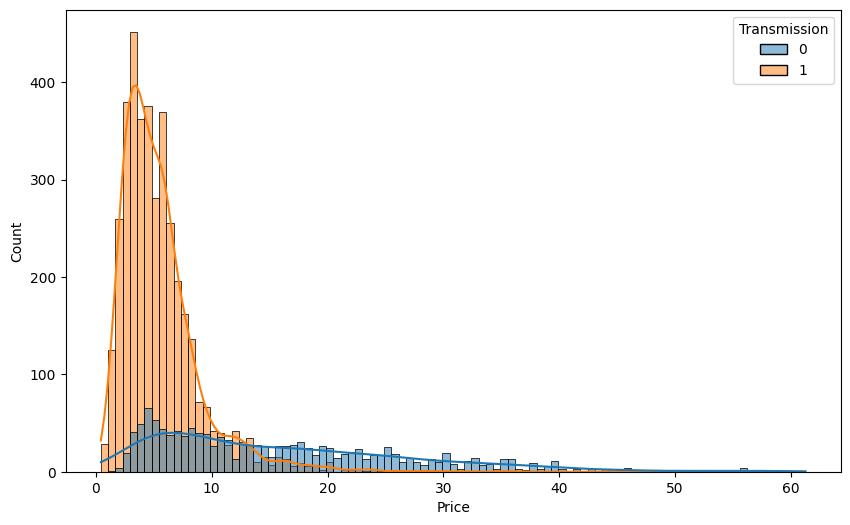

In [ ]:
### histplot 이용 --> Price 컬럼과 Transmission 컬럼의 관계 확인
plt.figure(figsize=(10,6))
sns.histplot(data=df_concat_labels, x='Price', hue='Transmission', kde=True)
plt.show()

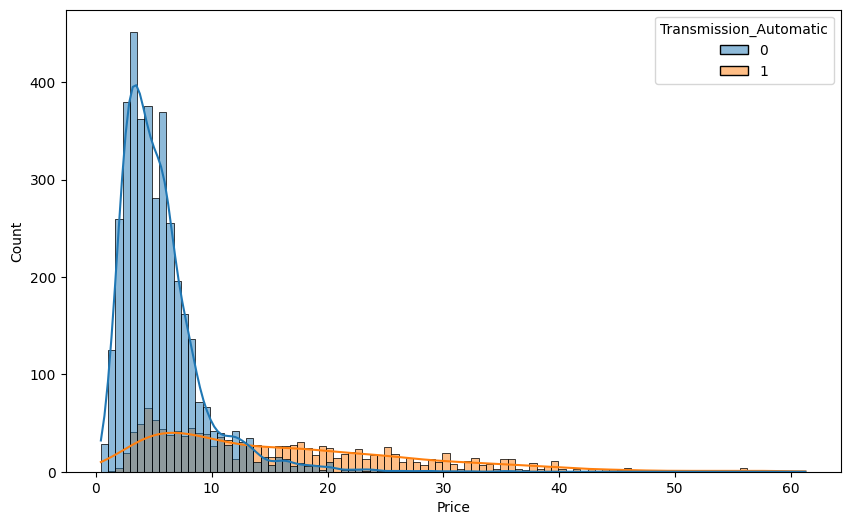

In [ ]:
### histplot 이용 --> Price 컬럼과 Transmission 컬럼의 관계 확인
plt.figure(figsize=(10,6))
sns.histplot(data=df_concat_dummies, x='Price', hue='Transmission_Automatic', kde=True)
plt.show()

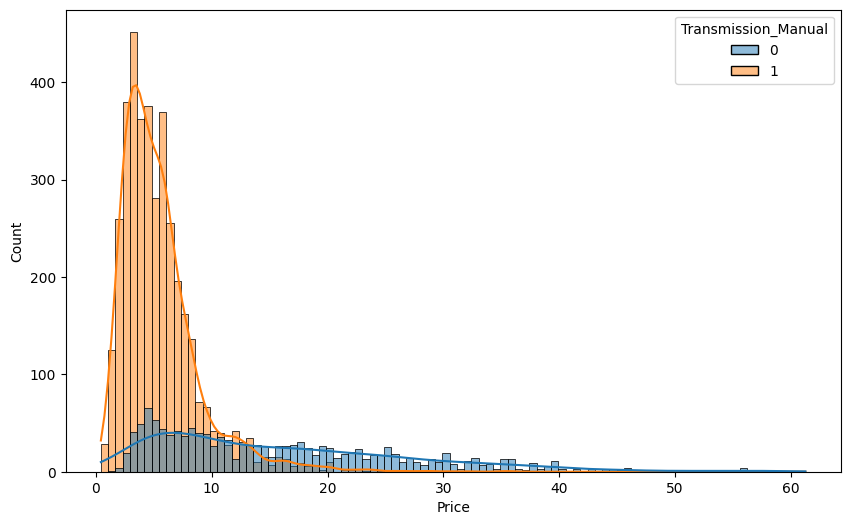

In [ ]:
### histplot 이용 --> Price 컬럼과 Transmission 컬럼의 관계 확인
plt.figure(figsize=(10,6))
sns.histplot(data=df_concat_dummies, x='Price', hue='Transmission_Manual', kde=True)
plt.show()

#### 중고차 가격과 Fuel_Type 관계 분석

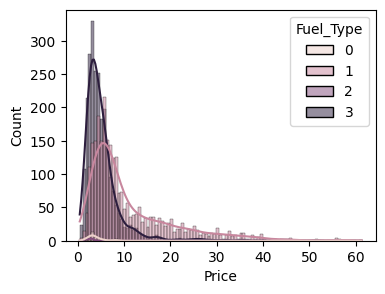

In [ ]:
### histplot을 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인

'''
### Fuel_Type : CNG --> 0, Diesel --> 1, LPG --> 2, Petrol --> 3
'''

sns.histplot(data=df_concat_labels, x='Price', hue='Fuel_Type', kde=True)
plt.show()

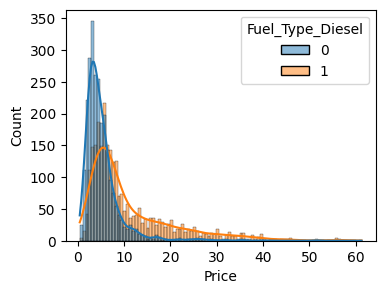

In [ ]:
### histplot을 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인
sns.histplot(data=df_concat_dummies, x='Price', hue='Fuel_Type_Diesel', kde=True)
plt.show()

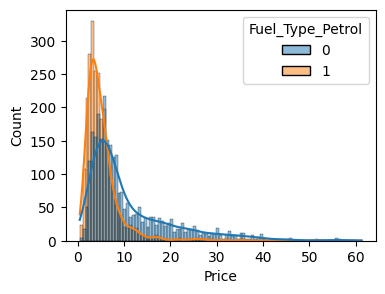

In [ ]:
### histplot을 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인
sns.histplot(data=df_concat_dummies, x='Price', hue='Fuel_Type_Petrol', kde=True)
plt.show()

#### 중고차 가격과 Kilometers_Driven 관계 분석

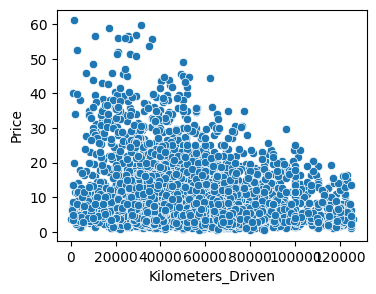

In [ ]:
### scatterplot 이용 --> Price 컬럼과 Kilometers_Driven 컬럼 관계 확인
sns.scatterplot(data=df_concat_labels, x='Kilometers_Driven', y='Price')
plt.show()

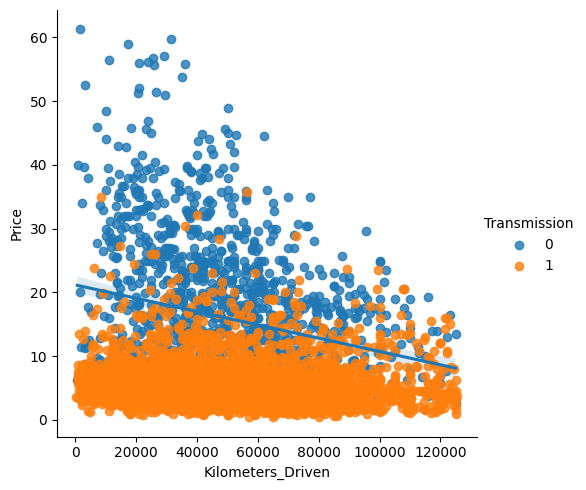

In [ ]:
### lmplot 이용 --> Price 컬럼과 Kilometers_Driven 컬럼 관계 확인
sns.lmplot(data=df_concat_labels, x='Kilometers_Driven', y='Price', hue='Transmission')
plt.show()

In [ ]:
df_concat_labels.loc[df_concat_labels.Transmission==0, ['Kilometers_Driven', 'Price']].corr()

,Kilometers_Driven,Price
Kilometers_Driven,1.000000,-0.232913
Price,-0.232913,1.000000


#### 중고차 가격과 Name의 관계 분석

In [ ]:
### Name과 연관된 컬럼 추출

print(df_concat_dummies.columns)

'''
'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
'Name_Nissan', 'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
'Name_Volkswagen', 'Name_Volvo'
'''

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price',
       'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun', 'Name_Fiat',
       'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai', 'Name_ISUZU',
       'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra', 'Name_Maruti',
       'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan',
       'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')


"\n'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',\n'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',\n'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',\n'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',\n'Name_Nissan', 'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',\n'Name_Volkswagen', 'Name_Volvo'\n"

Name_Audi 컬럼


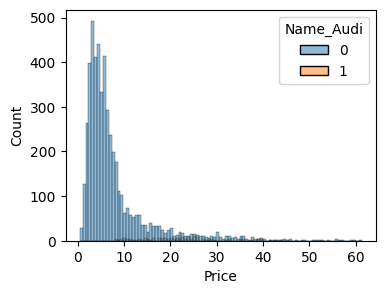

--------------------------------------------------------------------------------
Name_BMW 컬럼


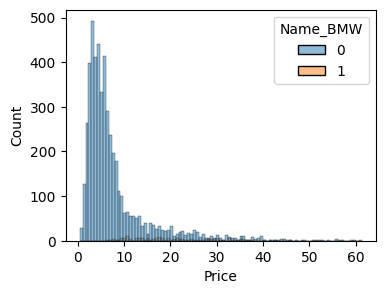

--------------------------------------------------------------------------------
Name_Chevrolet 컬럼


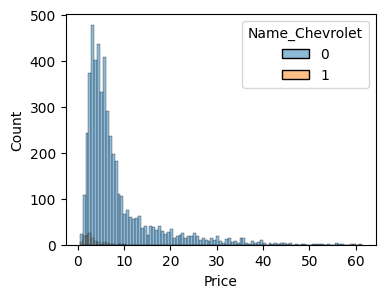

--------------------------------------------------------------------------------
Name_Datsun 컬럼


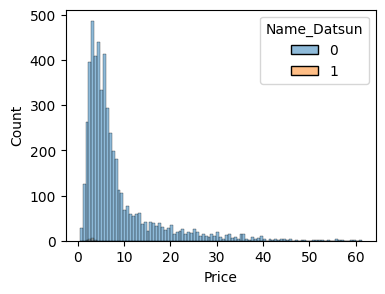

--------------------------------------------------------------------------------
Name_Fiat 컬럼


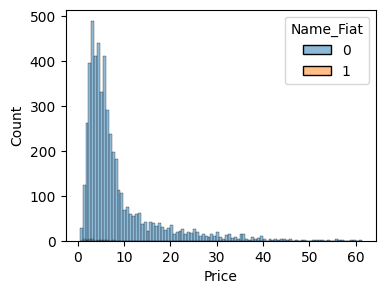

--------------------------------------------------------------------------------
Name_Force 컬럼


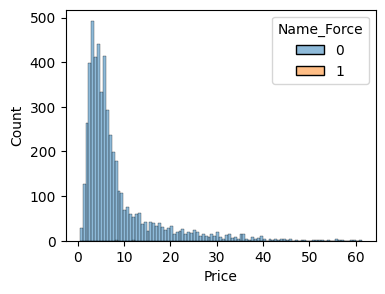

--------------------------------------------------------------------------------
Name_Ford 컬럼


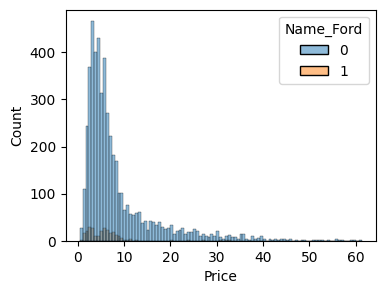

--------------------------------------------------------------------------------
Name_Honda 컬럼


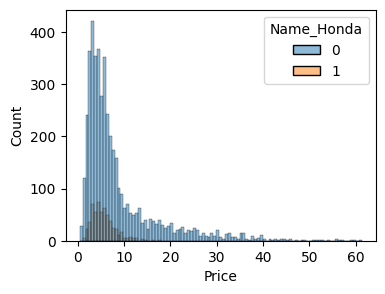

--------------------------------------------------------------------------------
Name_Hyundai 컬럼


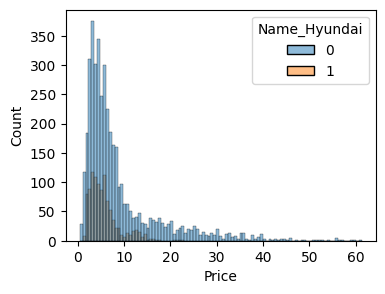

--------------------------------------------------------------------------------
Name_Jaguar 컬럼


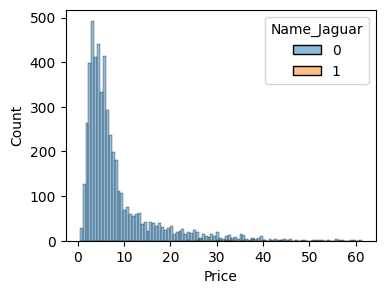

Name_Jeep 컬럼


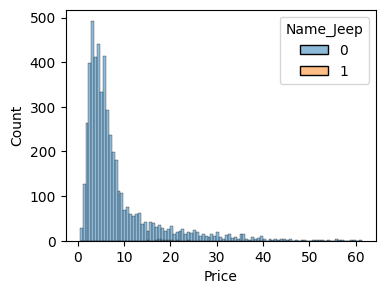

--------------------------------------------------------------------------------
Name_Land 컬럼


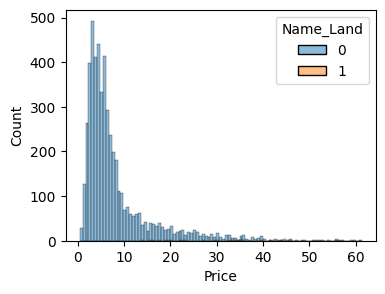

--------------------------------------------------------------------------------
Name_Mahindra 컬럼


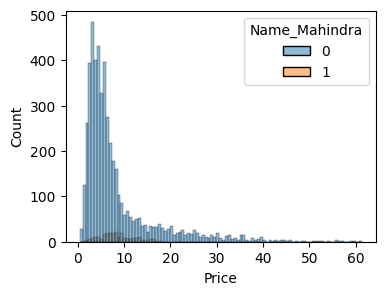

--------------------------------------------------------------------------------
Name_Maruti 컬럼


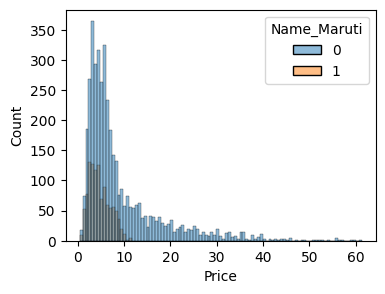

Name_Mercedes-Benz 컬럼


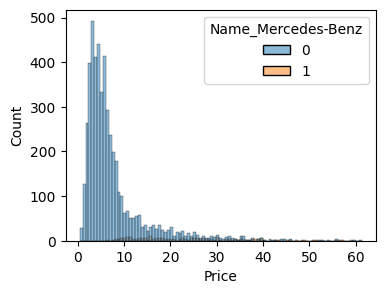

--------------------------------------------------------------------------------
Name_Mini 컬럼


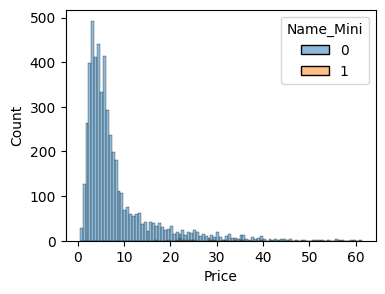

--------------------------------------------------------------------------------
Name_Mitsubishi 컬럼


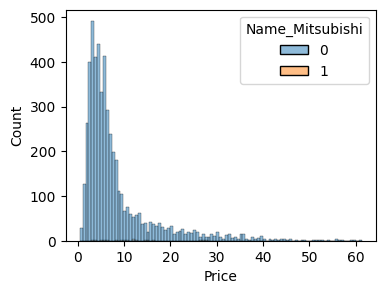

--------------------------------------------------------------------------------
Name_Nissan 컬럼


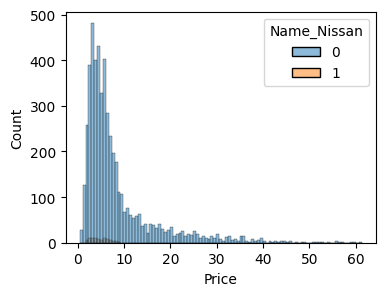

Name_Renault 컬럼


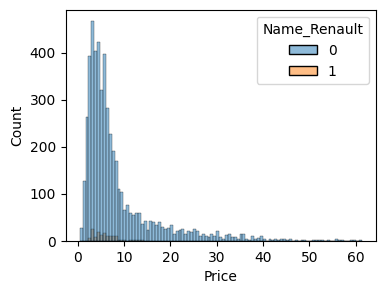

--------------------------------------------------------------------------------
Name_Skoda 컬럼


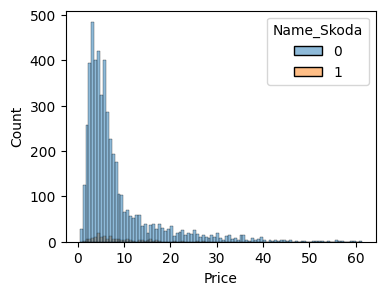

--------------------------------------------------------------------------------
Name_Tata 컬럼


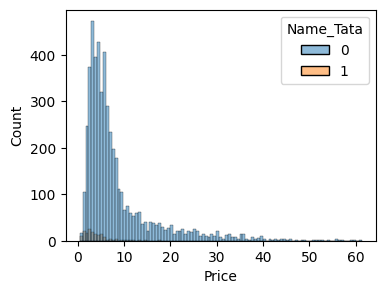

--------------------------------------------------------------------------------
Name_Toyota 컬럼


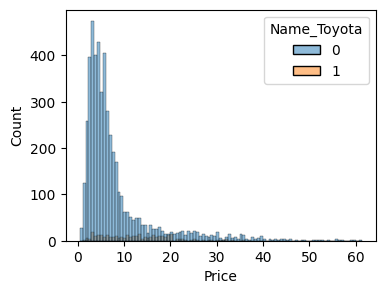

Name_Volkswagen 컬럼


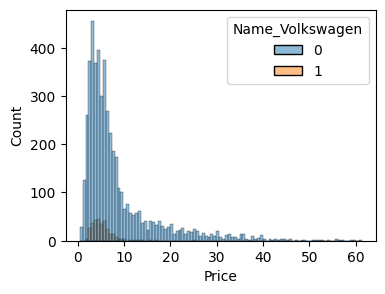

--------------------------------------------------------------------------------
Name_Volvo 컬럼


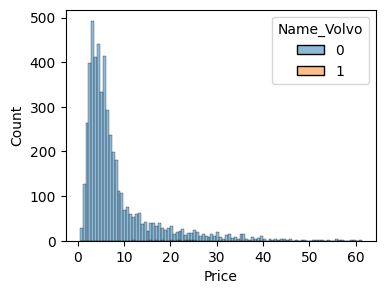

In [ ]:
### Price 컬럼과 Name 컬럼의 관계 확인

# Name_Audi 컬럼
print('Name_Audi 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Audi')
plt.show()

print('-'*80)

# Name_BMW 컬럼
print('Name_BMW 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_BMW')
plt.show()

print('-'*80)

# Name_Chevrolet 컬럼
print('Name_Chevrolet 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Chevrolet')
plt.show()

print('-'*80)

# Name_Datsun 컬럼
print('Name_Datsun 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Datsun')
plt.show()

print('-'*80)

# Name_Fiat 컬럼
print('Name_Fiat 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Fiat')
plt.show()

print('-'*80)

# Name_Force 컬럼
print('Name_Force 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Force')
plt.show()

print('-'*80)

# Name_Ford 컬럼
print('Name_Ford 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Ford')
plt.show()

print('-'*80)

# Name_Honda 컬럼
print('Name_Honda 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Honda')
plt.show()

print('-'*80)

# Name_Hyundai 컬럼
print('Name_Hyundai 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Hyundai')
plt.show()

print('-'*80)

# Name_Jaguar 컬럼
print('Name_Jaguar 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Jaguar')
plt.show()

# Name_Jeep 컬럼
print('Name_Jeep 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Jeep')
plt.show()

print('-'*80)

# Name_Land 컬럼
print('Name_Land 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Land')
plt.show()

print('-'*80)

# Name_Mahindra 컬럼
print('Name_Mahindra 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Mahindra')
plt.show()

print('-'*80)

# Name_Maruti 컬럼
print('Name_Maruti 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Maruti')
plt.show()

# Name_Mercedes-Benz 컬럼
print('Name_Mercedes-Benz 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Mercedes-Benz')
plt.show()

print('-'*80)

# Name_Mini 컬럼
print('Name_Mini 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Mini')
plt.show()

print('-'*80)

# Name_Mitsubishi 컬럼
print('Name_Mitsubishi 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Mitsubishi')
plt.show()

print('-'*80)

# Name_Nissan 컬럼
print('Name_Nissan 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Nissan')
plt.show()

# Name_Renault 컬럼
print('Name_Renault 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Renault')
plt.show()

print('-'*80)

# Name_Skoda 컬럼
print('Name_Skoda 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Skoda')
plt.show()

print('-'*80)

# Name_Tata 컬럼
print('Name_Tata 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Tata')
plt.show()

print('-'*80)

# Name_Toyota 컬럼
print('Name_Toyota 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Toyota')
plt.show()

# Name_Volkswagen 컬럼
print('Name_Volkswagen 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Volkswagen')
plt.show()

print('-'*80)

# Name_Volvo 컬럼
print('Name_Volvo 컬럼')
sns.histplot(data=df_concat_dummies, x='Price', hue='Name_Volvo')
plt.show()

### 결과 저장하기

In [ ]:
### 전처리와 탐색이 끝난 결과 --> csv 파일로 저장하기

# file 경로 설정하기
file_name_dummies = '/content/drive/MyDrive/used_car_preprocessed_dummies.csv'
file_name_labels = '/content/drive/MyDrive/used_car_preprocessed_labels.csv'
file_name_outlier = '/content/drive/MyDrive/used_car_preprocessed_outlier.csv'

# csv 파일로 저장 --> df.to_csv(file_name, index=False)
df_concat_dummies.to_csv(file_name_dummies, index=False)
df_concat_labels.to_csv(file_name_labels, index=False)
df_outlier.to_csv(file_name_outlier, index=False)